# Number of Players Earning at Least $X

The number of players earning at least a certain amount of prize money is calculated for each year by using the combined singles and doubles prize money data to count the number of players who earned the given amount.

In [12]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [13]:
START_YEAR = 2009
END_YEAR = datetime.datetime.now().year - 1
MIN_EARNINGS = 100000

In [14]:
data = []
for year in range(START_YEAR, END_YEAR + 1):
    df = pd.read_csv(f"../data/players/combined/{year}.gz")

    total = 0
    singles = 0
    doubles = 0
    for i, row in df.iterrows():
        if row["total_prize_money"] >= MIN_EARNINGS:
            total += 1
            if row["type"] == "singles":
                singles += 1
            elif row["type"] == "doubles":
                doubles += 1

    data.append({
        "year": year,
        "total": total,
        "singles": singles,
        "doubles": doubles,
    })

results = pd.DataFrame(data)

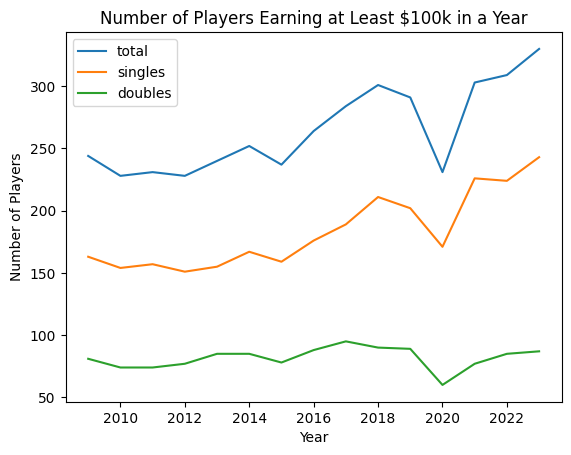

In [15]:
plt.plot(results["year"], results["total"], label="total")
plt.plot(results["year"], results["singles"], label="singles")
plt.plot(results["year"], results["doubles"], label="doubles")

plt.legend()
plt.title("Number of Players Earning at Least $100k in a Year")
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.show()